# Initial Library Load

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

import shap

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import (
  LabelEncoder,
  MinMaxScaler,
  OneHotEncoder,
  OrdinalEncoder,
)

import pickle

# Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import xgboost as xgb

We will use Random Forest, Linear Regression, CatBoostRegressor, XGboost Regressor

# Load Data

In [ ]:
# Business Flight
path1 = '/content/drive/MyDrive/Dibimbing/Final Project - Data Scientist/Dataset/business.csv'

# Economy Flight
path2 = '/content/drive/MyDrive/Dibimbing/Final Project - Data Scientist/Dataset/economy.csv'

In [ ]:
df_business = pd.read_csv(path1)
df_economy = pd.read_csv(path2)

# Data Pre-Processing

In [ ]:
df_business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [ ]:
df_economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


## Combining Dataframe

In [ ]:
# adding new column for class
df_business['class'] = 'business'
df_economy['class'] = 'economy'

In [ ]:
df = pd.concat([df_business, df_economy], ignore_index = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 27.5+ MB


## Data Cleaning

### Checking for duplicates

In [ ]:
len(df.drop_duplicates())/len(df)

0.9999933391282917

In [ ]:
# Handling the duplicates
df = df.drop_duplicates()
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",economy
300257,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",economy
300258,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy
300259,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy


In [ ]:
len(df.drop_duplicates())/len(df)

1.0

No More duplicates!

### Checking for unknown values

In [ ]:
for col in df.columns:
  print(f'=========================={col}==========================')
  display(df[col].value_counts())

==========================date==========================


,count
date,
07-03-2022,6633
28-02-2022,6603
21-03-2022,6594
14-03-2022,6586
08-03-2022,6577
06-03-2022,6543
01-03-2022,6541
15-03-2022,6536
22-03-2022,6535


==========================airline==========================


,count
airline,
Vistara,127859
Air India,80892
Indigo,43120
GO FIRST,23177
AirAsia,16098
SpiceJet,9011
StarAir,61
Trujet,41


==========================ch_code==========================


,count
ch_code,
UK,127859
AI,80892
6E,43120
G8,23177
I5,16098
SG,9011
S5,61
2T,41


==========================num_code==========================


,count
num_code,
808,3313
706,3235
772,2860
774,2808
720,2650
...,...
8480,1
2914,1
8106,1


==========================dep_time==========================


,count
dep_time,
07:00,8760
10:25,7693
19:00,5738
09:45,5468
08:30,4955
...,...
22:05,18
03:30,18
00:15,15


==========================from==========================


,count
from,
Delhi,61343
Mumbai,60903
Bangalore,52106
Kolkata,46347
Hyderabad,40860
Chennai,38700


==========================time_taken==========================


,count
time_taken,
02h 10m,4242
02h 15m,4036
02h 45m,2879
02h 05m,2755
02h 50m,2323
...,...
1.02h m,1
36h 15m,1
40h 45m,1


==========================stop==========================


,count
stop,
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t,243601
non-stop,36044
2+-stop,13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t,1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t,1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t,674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t,381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t,354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t,321


==========================arr_time==========================


,count
arr_time,
19:55,9194
20:55,6363
22:45,5282
09:40,5185
08:50,5125
...,...
06:20,20
03:45,18
05:45,15


==========================to==========================


,count
to,
Mumbai,59107
Delhi,57361
Bangalore,51112
Kolkata,49535
Hyderabad,42776
Chennai,40368


==========================price==========================


,count
price,
"54,608",1445
"2,339",1442
"54,684",1390
"60,978",1383
"60,508",1230
...,...
"87,514",1
"84,299",1
"75,227",1


==========================class==========================


,count
class,
economy,206772
business,93487


No Unknown Values detected!

### Creating Season column

In [ ]:
# Changing the date dtype to datetime64
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [ ]:
def datetime_to_season(datetime_series):
    month_to_season = {
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Autumn',
        10: 'Autumn',
        11: 'Autumn',
        12: 'Winter'
    }

    month = datetime_series.dt.month
    return month.map(month_to_season)

In [ ]:
df['season'] = datetime_to_season(df['date'])

In [ ]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,season
0,2022-02-11,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business,Winter
1,2022-02-11,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business,Winter
2,2022-02-11,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business,Winter
3,2022-02-11,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business,Winter
4,2022-02-11,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business,Winter


### Text Extracting

In [ ]:
# Extracting text to extract only essential text
df['stop'] = df['stop'].str.extract(r'([\w\+\d]+-stop)')
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,season
0,2022-02-11,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business,Winter
1,2022-02-11,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business,Winter
2,2022-02-11,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,"42,220",business,Winter
3,2022-02-11,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,"44,450",business,Winter
4,2022-02-11,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,"46,690",business,Winter


### Merging column `ch_code` and `num_code`

In [ ]:
df['flight_code'] = df['ch_code'].astype(str) + '-' + df['num_code'].astype(str)

In [ ]:
df = df.drop(['ch_code','num_code'], axis = 1)

### Extract text from `time_taken` and convert into hr.mins

In [ ]:
df['time_taken'] = (df['time_taken'].str.extract(r'(\d+)h\s*(\d+)m').astype(float)
    .apply(lambda x: x[0] + x[1]/60, axis=1).map(lambda x: f"{x:.2f}")
)

In [ ]:
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,season,flight_code
0,2022-02-11,Air India,18:00,Delhi,2.00,non-stop,20:00,Mumbai,"25,612",business,Winter,AI-868
1,2022-02-11,Air India,19:00,Delhi,2.25,non-stop,21:15,Mumbai,"25,612",business,Winter,AI-624
2,2022-02-11,Air India,20:00,Delhi,24.75,1-stop,20:45,Mumbai,"42,220",business,Winter,AI-531
3,2022-02-11,Air India,21:25,Delhi,26.50,1-stop,23:55,Mumbai,"44,450",business,Winter,AI-839
4,2022-02-11,Air India,17:15,Delhi,6.67,1-stop,23:55,Mumbai,"46,690",business,Winter,AI-544


### Changing `dep_time` and `arr_time` values to --> Early Morning, Morning, Afternoon, Evening, Night, Late Night

In [ ]:
# Creating Function to convert time to time period
def convert_to_time_period(time):
    hour = int(time.split(':')[0])
    if 4 <= hour <= 6:
        return 'Early Morning'
    elif 7 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 19:
        return 'Evening'
    elif 20 <= hour <= 22:
        return 'Night'
    else:
        return 'Late Night'

In [ ]:
df['departure_time'] = df['dep_time'].apply(convert_to_time_period)

In [ ]:
df['arrival_time'] = df['arr_time'].apply(convert_to_time_period)

In [ ]:
df = df.drop(['dep_time','arr_time'], axis = 1)
df

,date,airline,from,time_taken,stop,to,price,class,season,flight_code,departure_time,arrival_time
0,2022-02-11,Air India,Delhi,2.00,non-stop,Mumbai,"25,612",business,Winter,AI-868,Evening,Night
1,2022-02-11,Air India,Delhi,2.25,non-stop,Mumbai,"25,612",business,Winter,AI-624,Evening,Night
2,2022-02-11,Air India,Delhi,24.75,1-stop,Mumbai,"42,220",business,Winter,AI-531,Night,Night
3,2022-02-11,Air India,Delhi,26.50,1-stop,Mumbai,"44,450",business,Winter,AI-839,Night,Late Night
4,2022-02-11,Air India,Delhi,6.67,1-stop,Mumbai,"46,690",business,Winter,AI-544,Evening,Late Night
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,Chennai,13.83,1-stop,Hyderabad,"7,697",economy,Spring,UK-832,Morning,Night
300257,2022-03-31,Vistara,Chennai,13.83,1-stop,Hyderabad,"7,709",economy,Spring,UK-832,Morning,Night
300258,2022-03-31,Vistara,Chennai,20.58,1-stop,Hyderabad,"8,640",economy,Spring,UK-826,Afternoon,Morning
300259,2022-03-31,Vistara,Chennai,23.33,1-stop,Hyderabad,"8,640",economy,Spring,UK-822,Morning,Morning


### Converting datatypes

In [ ]:
df['price'] = (df['price'].str.extract(r'([\d,]+)').replace(',', '', regex=True).astype(int))

In [ ]:
df['time_taken'] = df['time_taken'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            300259 non-null  datetime64[ns]
 1   airline         300259 non-null  object        
 2   from            300259 non-null  object        
 3   time_taken      300255 non-null  float64       
 4   stop            300259 non-null  object        
 5   to              300259 non-null  object        
 6   price           300259 non-null  int64         
 7   class           300259 non-null  object        
 8   season          300259 non-null  object        
 9   flight_code     300259 non-null  object        
 10  departure_time  300259 non-null  object        
 11  arrival_time    300259 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 29.8+ MB


### Checking for null values

In [ ]:
len(df.dropna())/len(df)

0.9999866781678485

In [ ]:
df = df.dropna()

In [ ]:
len(df.dropna())/len(df)

1.0

### Outlier Handling

In [ ]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air India,80892
Indigo,43120
GO FIRST,23173
AirAsia,16098
SpiceJet,9011
StarAir,61
Trujet,41


In [ ]:
df = df[~df['airline'].isin(['StarAir', 'Trujet'])]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            300153 non-null  datetime64[ns]
 1   airline         300153 non-null  object        
 2   from            300153 non-null  object        
 3   time_taken      300153 non-null  float64       
 4   stop            300153 non-null  object        
 5   to              300153 non-null  object        
 6   price           300153 non-null  int64         
 7   class           300153 non-null  object        
 8   season          300153 non-null  object        
 9   flight_code     300153 non-null  object        
 10  departure_time  300153 non-null  object        
 11  arrival_time    300153 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 29.8+ MB


In [ ]:
df.describe()

,date,time_taken,price
count,300153,300153.000000,300153.000000
mean,2022-03-08 00:06:50.478655744,12.221021,20889.660523
min,2022-02-11 00:00:00,0.830000,1105.000000
25%,2022-02-25 00:00:00,6.830000,4783.000000
50%,2022-03-08 00:00:00,11.250000,7425.000000
75%,2022-03-20 00:00:00,16.170000,42521.000000
max,2022-03-31 00:00:00,49.830000,123071.000000
std,NaN,7.191997,22697.767366


# EDA

/tmp/ipython-input-2347771286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=departure_counts.index, y=departure_counts.values, palette='viridis')


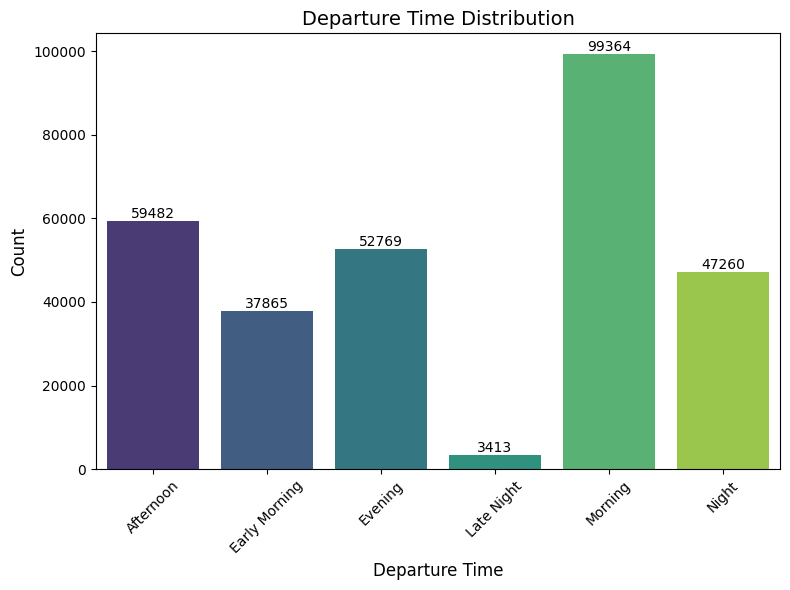

In [ ]:
plt.figure(figsize=(8, 6))
departure_counts = df['departure_time'].value_counts().sort_index()
ax = sns.barplot(x=departure_counts.index, y=departure_counts.values, palette='viridis')

plt.title('Departure Time Distribution', fontsize=14)
plt.xlabel('Departure Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

/tmp/ipython-input-587774068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="departure_time", y="price", data=df_temp, palette='viridis')


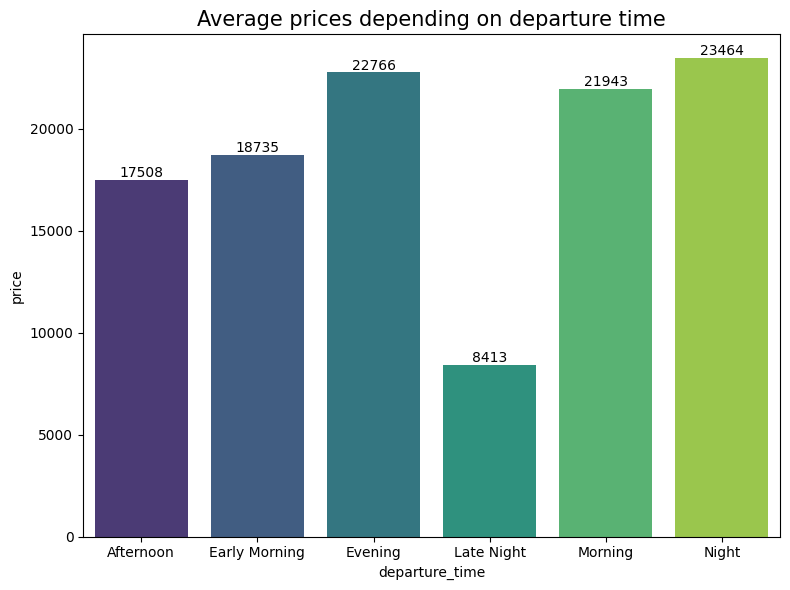

In [ ]:
df_temp = df.groupby(['departure_time'])['price'].mean().reset_index()

plt.figure(figsize=(8,6))
ax = sns.barplot(x="departure_time", y="price", data=df_temp, palette='viridis')
ax.set_title("Average prices depending on departure time", fontsize=15)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

Detailin lagi morning dan late night EDAnya cari korelasinya sama variabel lain

/tmp/ipython-input-88659201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=departure_counts.index, y=departure_counts.values, palette='viridis')


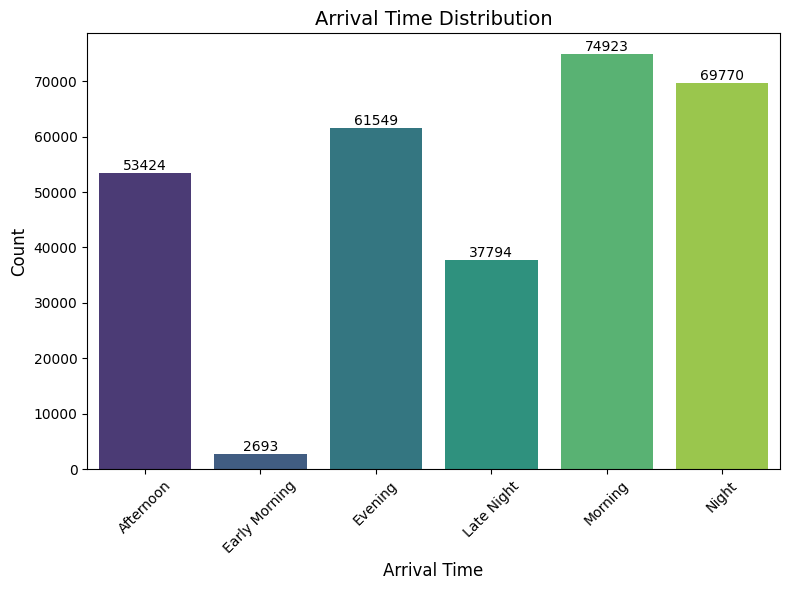

In [ ]:
plt.figure(figsize=(8, 6))
departure_counts = df['arrival_time'].value_counts().sort_index()
ax = sns.barplot(x=departure_counts.index, y=departure_counts.values, palette='viridis')

plt.title('Arrival Time Distribution', fontsize=14)
plt.xlabel('Arrival Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

/tmp/ipython-input-819843839.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="arrival_time", y="price", data=df_temp, palette='viridis')


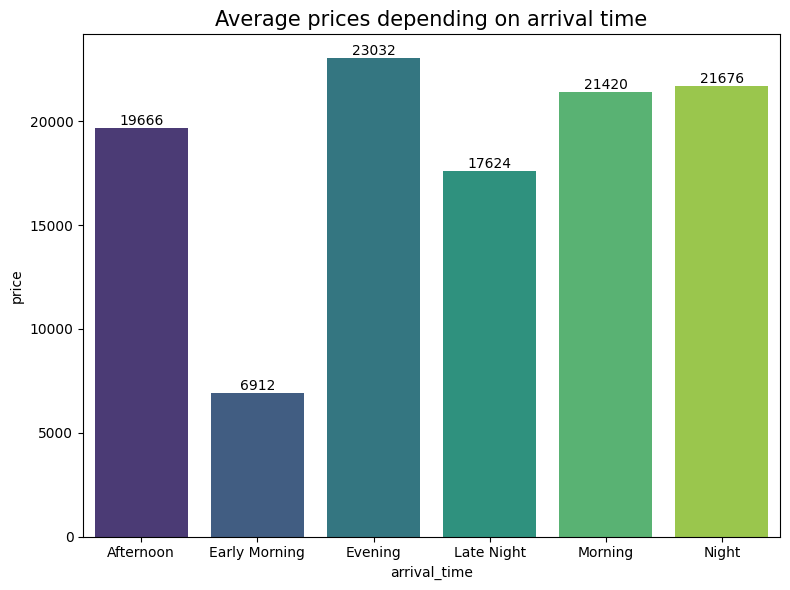

In [ ]:
df_temp = df.groupby(['arrival_time'])['price'].mean().reset_index()

plt.figure(figsize=(8,6))
ax = sns.barplot(x="arrival_time", y="price", data=df_temp, palette='viridis')
ax.set_title("Average prices depending on arrival time", fontsize=15)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

**Insight**
* A lot of the `Departure` flights are in Morning and Afternoon <br>
* A lot of the `Arrival` flights are in Morning and Night <br>
4.00 - 6.00 = Early Morning <br>
7.00 - 11.00 = Morning <br>
12.00 - 16.00 = Afternoon <br>
17.00 - 19.00 = Evening <br>
20.00 - 22.00 = Night <br>
23.00 - 03.00 = Late Night

Text(0, 0.5, 'Count')

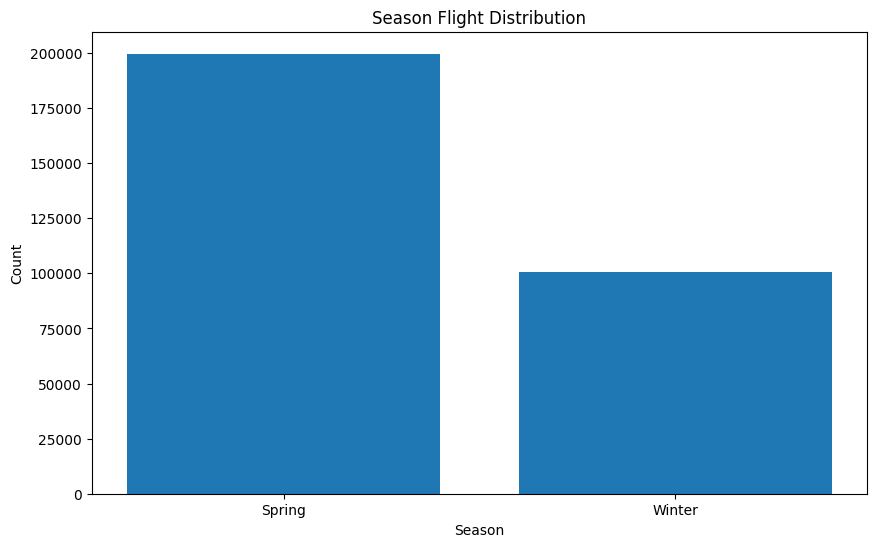

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['season'].value_counts().index,
        df['season'].value_counts().values)
plt.title('Season Flight Distribution')
plt.xlabel('Season')
plt.ylabel('Count')

([<matplotlib.patches.Wedge at 0x7d4b457d5010>,
 [Text(0.25349753295603505, 1.0703919846417032, 'Vistara'),
  Text(-1.0208842029294103, -0.40962842212080813, 'Air India'),
  Text(0.11941632826577686, -1.0934988525570204, 'Indigo'),
  Text(0.7911114347046972, -0.7642922856338901, 'GO FIRST'),
  Text(1.030597559322457, -0.3845369562455535, 'AirAsia'),
  Text(1.095111212714227, -0.10359262419484844, 'SpiceJet')],
 [Text(0.13827138161238273, 0.5838501734409289, '42.60%'),
  Text(-0.5568459288705874, -0.22343368479316805, '26.95%'),
  Text(0.06513617905406009, -0.5964539195765566, '14.37%'),
  Text(0.4315153280207439, -0.41688670125484906, '7.72%'),
  Text(0.5621441232667946, -0.2097474306793928, '5.36%'),
  Text(0.5973333887532147, -0.0565050677426446, '3.00%')])

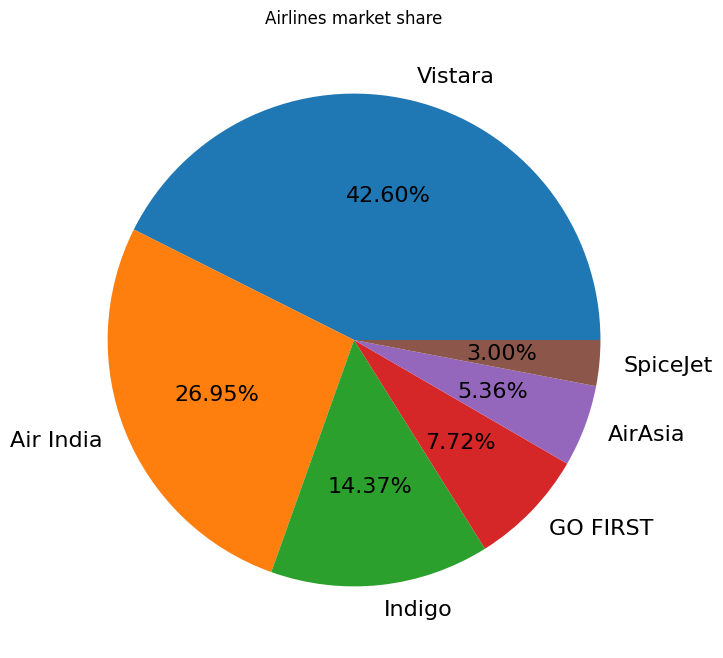

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
plt.title('Airlines market share')

ax.pie(
    df['airline'].value_counts().values,
    labels=df['airline'].value_counts().index,
    autopct='%1.2f%%',
    textprops={'fontsize': 16}
)

**Insight**


*   Vistara are the most used airline in this multiple route
*   Air India come in the second most used airline in this multiple route

So Vistara & Air India could also increase their price for more revenue since their flight are in high demand



Text(0.5, 1.0, 'Airline average prices based economy class and airlines')

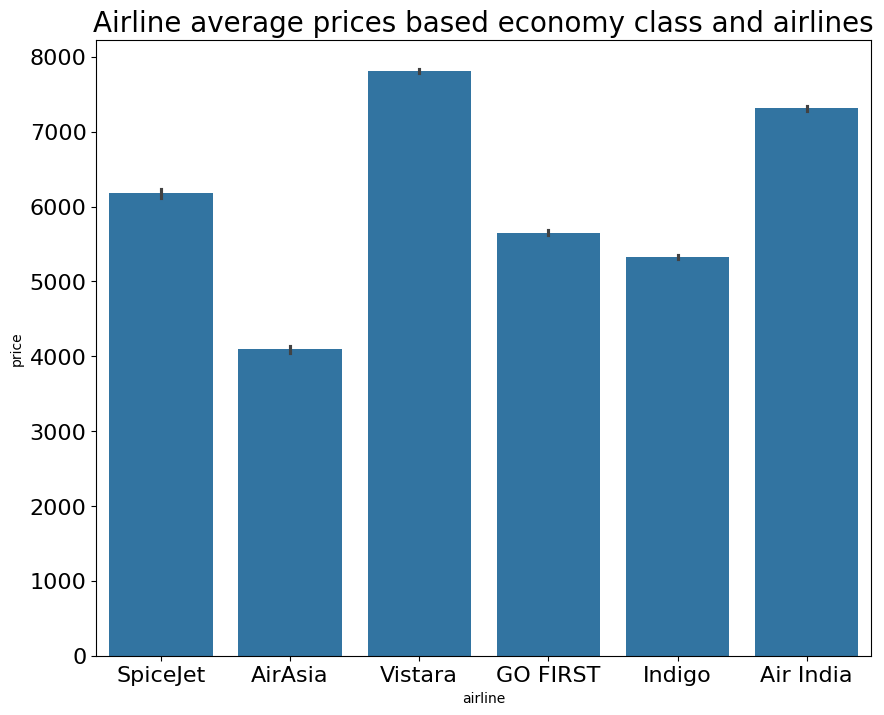

In [ ]:
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x='airline',y='price',data=df[df['class'] == 'economy'], estimator='mean').set_title(
    'Airline average prices based economy class and airlines',fontsize=20)

Text(0.5, 1.0, 'Airline prices based on the class and company')

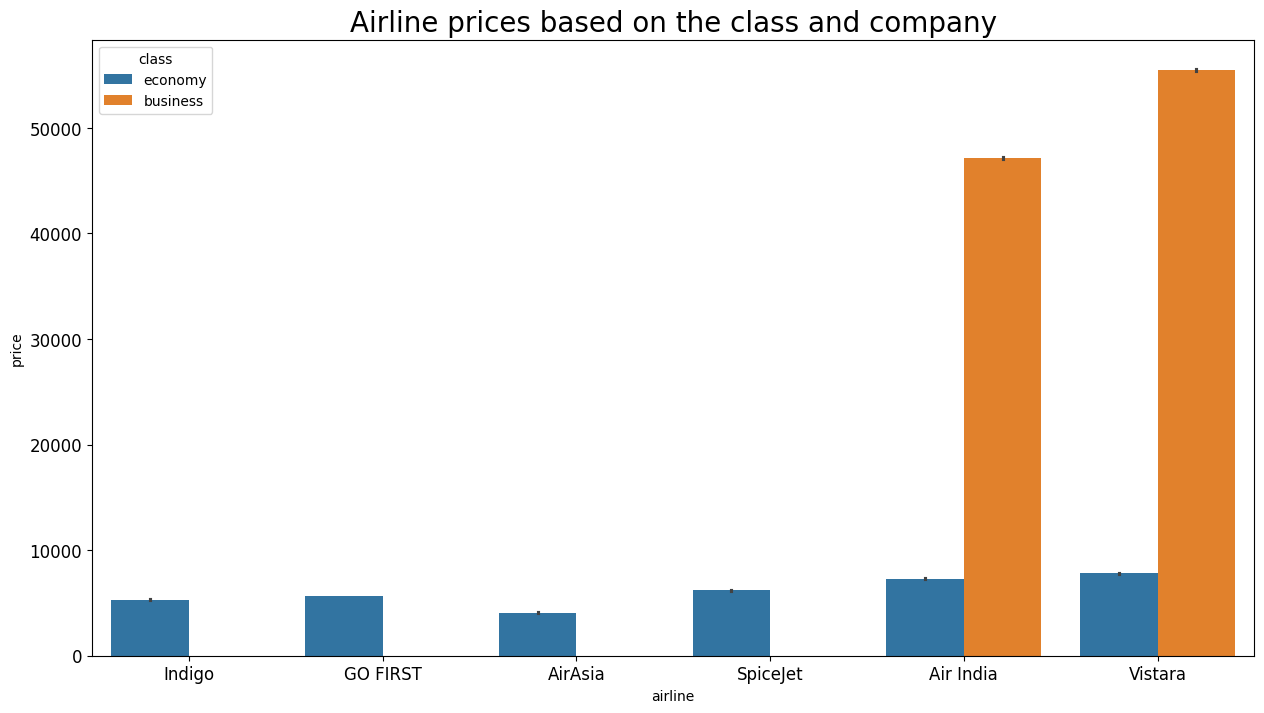

In [ ]:
plt.figure(figsize=(15, 8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

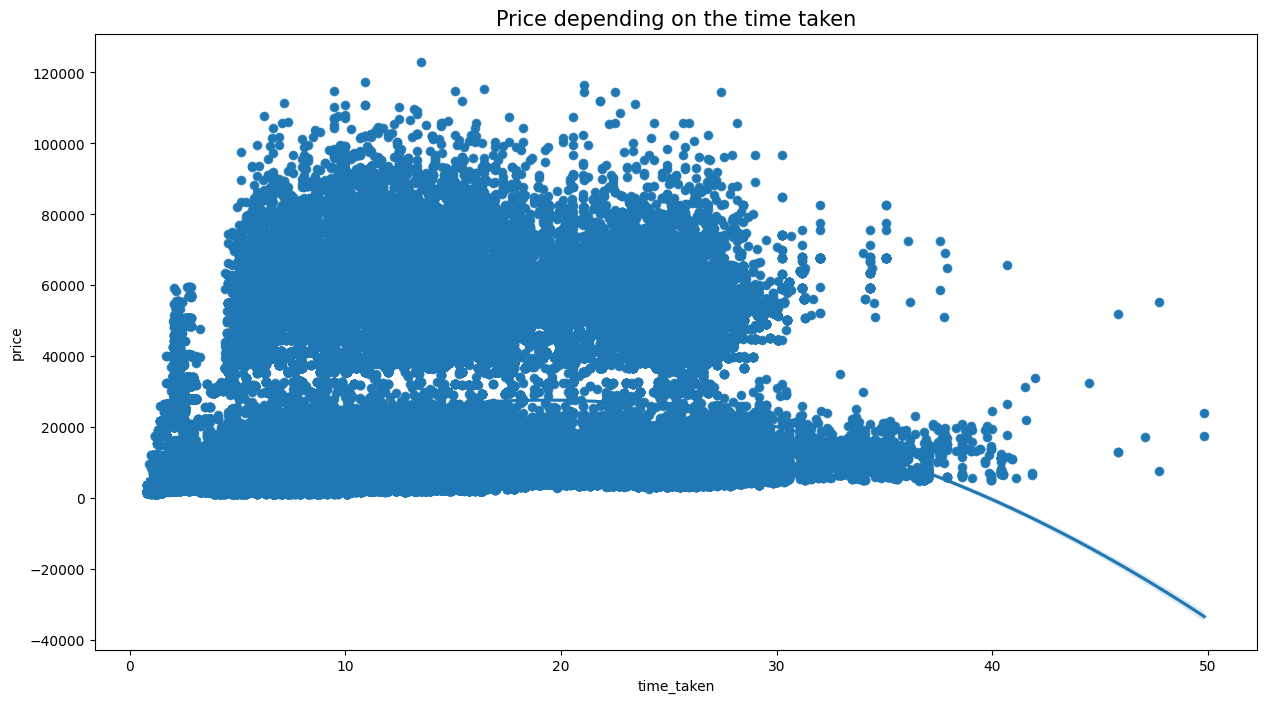

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="time_taken", y="price", data=df).set_title("Price depending on the time taken",fontsize=15)
ax = sns.regplot(x="time_taken", y="price", data=df, order=2)

# Split Dataset

In [ ]:
# Split train test
X = df.drop(columns='price')
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Creating dataset copy for CatBoost Regressor
X_train_cbr = X_train.copy()
X_test_cbr = X_test.copy()
y_train_cbr = y_train.copy()
y_test_cbr = y_test.copy()

### Data Transformation

#### Drop Useless Columns

In [ ]:
X_train = X_train.drop(columns=['flight_code','date'])

In [ ]:
X_test = X_test.drop(columns=['flight_code','date'])

In [ ]:
X_train_cbr = X_train_cbr.drop(columns = ['flight_code','time_taken','date'])

In [ ]:
X_test_cbr = X_test_cbr.drop(columns = ['flight_code','time_taken','date'])

#### Encode Nominal Variables

In [ ]:
# Encode 'Stop' Column using OrinalEncoder
stop_encoder = OrdinalEncoder(
    categories=[['2+-stop', '1-stop', 'non-stop']],
    handle_unknown='error',
    )

X_train['stop'] = stop_encoder.fit_transform(X_train[['stop']])
X_test['stop'] = stop_encoder.transform(X_test[['stop']])

In [ ]:
# Encode 'Class' Column using OrinalEncoder
class_encoder = OrdinalEncoder(
    categories=[['economy', 'business']],
    handle_unknown='error',
    )

X_train['class'] = class_encoder.fit_transform(X_train[['class']])
X_test['class'] = class_encoder.transform(X_test[['class']])

#### Scale Numeric Variables

In [ ]:
# Scale 'Time Taken' column for better machine reading using MinMaxScaler
scaler = MinMaxScaler()
X_train['time_taken'] = scaler.fit_transform(X_train[['time_taken']])
X_test['time_taken'] = scaler.transform(X_test[['time_taken']])

scaler.inverse_transform([[1]])

array([[49.83]])

#### Encode Categorical Variables

In [ ]:
# Encode 'airline' column with LabelEncoder
airline_encoder = LabelEncoder()

X_train['airline'] = airline_encoder.fit_transform(X_train[['airline']])
X_test['airline'] = airline_encoder.transform(X_test[['airline']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Encode 'from' column with LabelEncoder
from_encoder = LabelEncoder()

X_train['from'] = from_encoder.fit_transform(X_train[['from']])
X_test['from'] = from_encoder.transform(X_test[['from']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Encode 'to' column with LabelEncoder
to_encoder = LabelEncoder()

X_train['to'] = to_encoder.fit_transform(X_train[['to']])
X_test['to'] = to_encoder.transform(X_test[['to']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Encode 'season' column with LabelEncoder
season_encoder = LabelEncoder()

X_train['season'] = season_encoder.fit_transform(X_train[['season']])
X_test['season'] = season_encoder.transform(X_test[['season']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Encode 'departure_time' column with LabelEncoder
departure_time_encoder = LabelEncoder()

X_train['departure_time'] = departure_time_encoder.fit_transform(X_train[['departure_time']])
X_test['departure_time'] = departure_time_encoder.transform(X_test[['departure_time']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Encode 'arrival_time' column with LabelEncoder
arrival_time_encoder = LabelEncoder()

X_train['arrival_time'] = arrival_time_encoder.fit_transform(X_train[['arrival_time']])
X_test['arrival_time'] = arrival_time_encoder.transform(X_test[['arrival_time']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


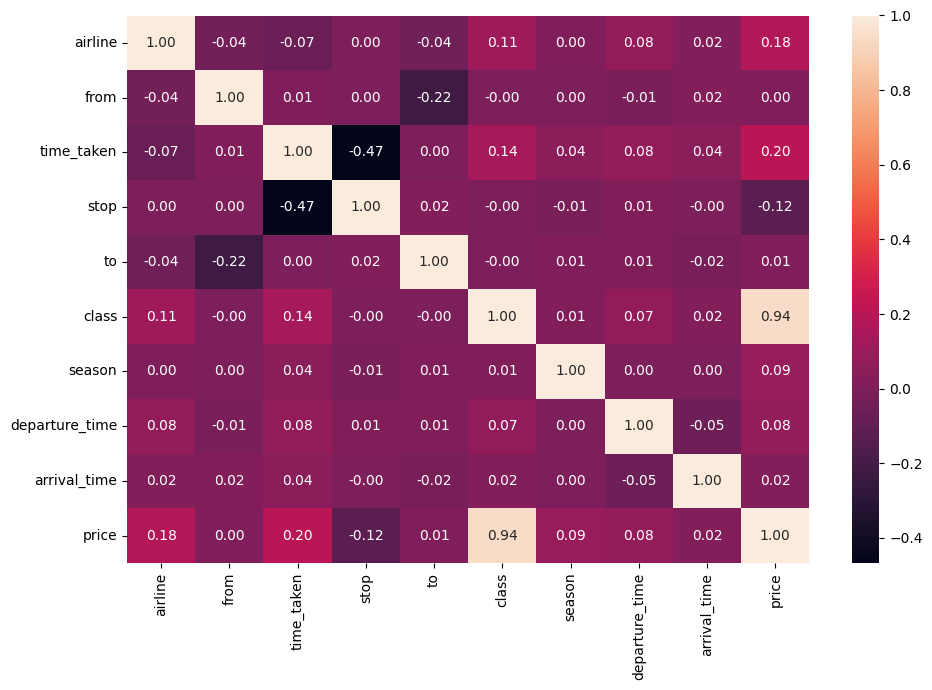

In [ ]:
# Create Heatmap Correlation
flightprice_train = pd.concat([X_train, y_train], axis=1)
corr = flightprice_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

# Model Training

## Train

### Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_train)

In [ ]:
rmse = mean_squared_error(y_train, y_pred)
r2   = r2_score(y_train, y_pred)
mape = mean_absolute_percentage_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.4f}")
print(f"MAE = {mae:.2f}")

RMSE = 48,068,872
R²   = 0.907
MAPE = 0.4245
MAE = 4537.82


### CatBoost Regression

#### Not Tuned

In [ ]:
cbr = CatBoostRegressor(
    cat_features=list(X_train_cbr.columns)
)

In [ ]:
cbr.fit(X_train_cbr, y_train_cbr)

Learning rate set to 0.097339
0:	learn: 20748.0145275	total: 328ms	remaining: 5m 27s
1:	learn: 19013.9616602	total: 663ms	remaining: 5m 30s
2:	learn: 17474.2725919	total: 1s	remaining: 5m 32s
3:	learn: 16111.2948545	total: 1.14s	remaining: 4m 44s
4:	learn: 14908.8844442	total: 1.26s	remaining: 4m 10s
5:	learn: 13720.9570929	total: 1.51s	remaining: 4m 10s
6:	learn: 12676.5648151	total: 1.72s	remaining: 4m 4s
7:	learn: 11750.8986317	total: 2s	remaining: 4m 8s
8:	learn: 10938.6886868	total: 2.26s	remaining: 4m 8s
9:	learn: 10229.3734162	total: 2.48s	remaining: 4m 5s
10:	learn: 9612.6519997	total: 2.66s	remaining: 3m 59s
11:	learn: 9079.2079106	total: 2.89s	remaining: 3m 57s
12:	learn: 8620.2041536	total: 3s	remaining: 3m 47s
13:	learn: 8230.1295499	total: 3.09s	remaining: 3m 37s
14:	learn: 7894.9165992	total: 3.21s	remaining: 3m 30s
15:	learn: 7612.9600671	total: 3.3s	remaining: 3m 22s
16:	learn: 7304.5948873	total: 3.45s	remaining: 3m 19s
17:	learn: 7043.2120054	total: 3.59s	remaining: 3

In [ ]:
y_pred = cbr.predict(X_train_cbr)

In [ ]:
rmse = mean_squared_error(y_train_cbr, y_pred)
r2   = r2_score(y_train_cbr, y_pred)
mape = mean_absolute_percentage_error(y_train_cbr, y_pred)
mae = mean_absolute_error(y_train_cbr, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.4f}")
print(f"MAE = {mae:.2f}")

RMSE = 16,997,038
R²   = 0.967
MAPE = 0.1807
MAE = 2349.35


#### Tuned


In [ ]:
cat_features=list(X_train_cbr.columns)

In [ ]:
param_grid = {
    'iterations': [1000],
    'learning_rate': [0.1, 0.2],
    'verbose': [100],
    'depth': [6, 8],
    'l2_leaf_reg': [3, 4],
}

grid_search = GridSearchCV(
    estimator=cbr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # For regression
    cv=5,
    n_jobs=-1,
    verbose=3
)

grid_search.fit(X_train_cbr, y_train_cbr, cat_features=cat_features)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0:	learn: 18724.6837750	total: 185ms	remaining: 3m 4s
100:	learn: 4226.2763491	total: 32s	remaining: 4m 45s
200:	learn: 4078.6615631	total: 1m 2s	remaining: 4m 8s
300:	learn: 4023.0067532	total: 1m 34s	remaining: 3m 38s
400:	learn: 3983.3415320	total: 2m 3s	remaining: 3m 4s
500:	learn: 3955.1837015	total: 2m 31s	remaining: 2m 31s
600:	learn: 3932.3681254	total: 3m 1s	remaining: 2m
700:	learn: 3913.6759058	total: 3m 31s	remaining: 1m 30s
800:	learn: 3898.5344000	total: 3m 59s	remaining: 59.5s
900:	learn: 3883.8147367	total: 4m 27s	remaining: 29.4s
999:	learn: 3868.4739030	total: 4m 55s	remaining: 0us


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f663837a810>,
             n_jobs=-1,
             param_grid={'depth': [6, 8], 'iterations': [1000],
                         'l2_leaf_reg': [3, 4], 'learning_rate': [0.1, 0.2],
                         'verbose': [100]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# Best model
cbr_best_model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)

Best Params: {'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.2, 'verbose': 100}


In [ ]:
y_pred = cbr_best_model.predict(X_train_cbr)

In [ ]:
rmse = mean_squared_error(y_train, y_pred)
r2   = r2_score(y_train, y_pred)
mape = mean_absolute_percentage_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.4f}")
print(f"MAE = {mae:.2f}")

RMSE = 15,545,698
R²   = 0.970
MAPE = 0.1647
MAE = 2182.18


### Random Forest

#### Not Tuned

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred = rf.predict(X_train)

In [ ]:
rmse = mean_squared_error(y_train, y_pred)
r2   = r2_score(y_train, y_pred)
mape = mean_absolute_percentage_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.2f}")
print(f"MAE = {mae:.2f}")

RMSE = 6,977,371
R²   = 0.986
MAPE = 0.11
MAE = 1245.80


#### Tuned

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 0.5]
}

model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # For regression
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best model
rf_best_model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)

Best Params: {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}


In [ ]:
y_pred = rf_best_model.predict(X_train)
y_pred

array([ 7926.99100066, 65435.04657325,  9792.67263098, ...,
        8740.94117681,  9038.70736246,  4475.91600601])

In [ ]:
rmse = mean_squared_error(y_train, y_pred)
r2   = r2_score(y_train, y_pred)
mape = mean_absolute_percentage_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.2f}")
print(f"MAE = {mae:.2f}")

RMSE = 7,076,579
R²   = 0.986
MAPE = 0.11
MAE = 1265.44


### XGBoost

#### Not Tuned

In [ ]:
xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_train)

In [ ]:
rmse = mean_squared_error(y_train, y_pred)
r2   = r2_score(y_train, y_pred)
mape = mean_absolute_percentage_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.2f}")
print(f"MAE = {mae:.2f}")

RMSE = 13,190,740
R²   = 0.974
MAPE = 0.18
MAE = 2124.76


#### Tuned

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Minimize MSE
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
 # Best model
xgb_best_model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)

Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
y_pred = xgb_best_model.predict(X_train)

In [ ]:
# Evaluation Metrics
rmse = mean_squared_error(y_train, y_pred)
r2   = r2_score(y_train, y_pred)
mape = mean_absolute_percentage_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.2f}")
print(f"MAE = {mae:.2f}")

RMSE = 9,659,359
R²   = 0.981
MAPE = 0.15
MAE = 1742.35


## Test

### Linear Regression

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
# Evaluation Metrics
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.4f}")
print(f"MAE = {mae:.2f}")

RMSE = 49,249,468
R²   = 0.904
MAPE = 0.4213
MAE = 4564.53


### Catboost Regression

#### Not Tuned

In [ ]:
y_pred = cbr.predict(X_test_cbr)

In [ ]:
# Evaluation Metrics
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.4f}")
print(f"MAE = {mae:.2f}")

RMSE = 17,602,003
R²   = 0.966
MAPE = 0.1797
MAE = 2362.29


#### Tuned

In [ ]:
y_pred = cbr_best_model.predict(X_test_cbr)

In [ ]:
# Evaluation Metrics
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.4f}")
print(f"MAE = {mae:.2f}")

RMSE = 16,274,132
R²   = 0.968
MAPE = 0.1651
MAE = 2210.76


### Random Forest

#### Not Tuned

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
# Evaluation Metrics
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.4f}")
print(f"MAE = {mae:.2f}")

RMSE = 9,141,751
R²   = 0.982
MAPE = 0.1183
MAE = 1409.91


#### Tuned

In [ ]:
y_pred = rf_best_model.predict(X_test)

In [ ]:
# Evaluation Metrics
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.4f}")
print(f"MAE = {mae:.2f}")

RMSE = 9,117,210
R²   = 0.982
MAPE = 0.1186
MAE = 1417.83


### XGBoost

#### Not Tuned

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
# Evaluation Metrics
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.4f}")
print(f"MAE = {mae:.2f}")

RMSE = 13,834,869
R²   = 0.973
MAPE = 0.1764
MAE = 2157.25


#### Tuned

In [ ]:
y_pred = xgb_best_model.predict(X_test)

In [ ]:
# Evaluation Metrics
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE = {rmse:,.0f}")
print(f"R²   = {r2:.3f}")
print(f"MAPE = {mape:.4f}")
print(f"MAE = {mae:.2f}")

RMSE = 10,578,190
R²   = 0.979
MAPE = 0.1530
MAE = 1795.04


# Save the best model

In [ ]:
feature_names = X_train.columns.tolist()
feature_names

['airline',
 'from',
 'time_taken',
 'stop',
 'to',
 'class',
 'season',
 'departure_time',
 'arrival_time']

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump((rf, feature_names), file)

In [ ]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Save the Encoder

In [ ]:
with open('encoders.pkl', 'wb') as f:
    pickle.dump({
        'stop_encoder': stop_encoder,
        'class_encoder': class_encoder,
        'airline_encoder': airline_encoder,
        'from_encoder': from_encoder,
        'to_encoder': to_encoder,
        'season_encoder': season_encoder,
        'departure_time_encoder': departure_time_encoder,
        'arrival_time_encoder': arrival_time_encoder,
        'scaler': scaler
    }, f)

In [ ]:
files.download('encoders.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train.columns

Index(['date', 'airline', 'from', 'time_taken', 'stop', 'to', 'class',
       'season', 'flight_code', 'departure_time', 'arrival_time'],
      dtype='object')